In [ ]:

from keras.layers import Input, Dense, Flatten,Dropout,GlobalAveragePooling2D
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt




In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/train'
valid_path = '/content/test'

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
mob = MobileNet(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = IMAGE_SIZE + [3])






In [ ]:
for layer in vgg.layers:
  layer.trainable = False

folders = glob('/content/train/*')

folders

def create(bottom_model, num_classes):
    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model

output=create(vgg,3)

model = Model(inputs=vgg.input, outputs=output)

model.summary()

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)




Found 676 images belonging to 3 classes.
Found 20 images belonging to 3 classes.
Epoch 1/10
22/22 [==============================] - 365s 17s/step - loss: 0.0802 - accuracy: 0.9689 - val_loss: 0.5900 - val_accuracy: 0.8000
Epoch 2/10
22/22 [==============================] - 365s 17s/step - loss: 0.0479 - accuracy: 0.9882 - val_loss: 0.6741 - val_accuracy: 0.7500
Epoch 3/10
22/22 [==============================] - 362s 16s/step - loss: 0.0311 - accuracy: 0.9896 - val_loss: 0.8618 - val_accuracy: 0.8000
Epoch 4/10
22/22 [==============================] - 362s 16s/step - loss: 0.0278 - accuracy: 0.9896 - val_loss: 0.7653 - val_accuracy: 0.7500
Epoch 5/10
22/22 [==============================] - 364s 17s/step - loss: 0.0282 - accuracy: 0.9896 - val_loss: 0.7949 - val_accuracy: 0.7500
Epoch 6/10
22/22 [==============================] - 361s 16s/step - loss: 0.0636 - accuracy: 0.9793 - val_loss: 0.5601 - val_accuracy: 0.8000
Epoch 7/10
22/22 [==============================] - 363s 17s/step -

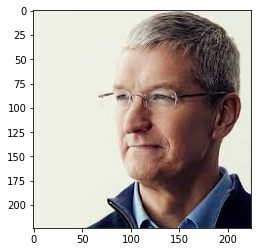

Predicted by model: Tim Cook


In [ ]:
from keras.preprocessing import image
import numpy as np

file_path="/content/test/timcook/tt9.jpg"
cimage = image.load_img(file_path, target_size=(224,224,3))

cimage = image.img_to_array(cimage)
cimage = np.expand_dims(cimage, axis=0)
result = model.predict(cimage)
if result.argmax()==0:
  pred="Elon Musk"
else:
  pred="Tim Cook"
import matplotlib.pyplot as plt
cimage = image.load_img(file_path, target_size=(224,224,3))
plt.imshow(cimage)
plt.show()
print("Predicted by model:",pred)

#test_images("/content/test/timcook/tim.jpg")
